In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [44]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

### Import Dataset

In [3]:
v = pd.read_csv("volunteer_opportunities.csv")
v[:3]

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

### Null Values Handling

**Remove columns which have more than 3 null values**

In [5]:
df = v.dropna(axis = 1, thresh = 3)
df.shape

(665, 24)

**Drop rows where the category_desc column values are missing**

In [6]:
volunteer_subset = v[v["category_desc"].notnull()]
volunteer_subset.shape

(617, 35)

### Working with Data Types

**Convert hits data type to int**

In [21]:
volunteer_subset["hits"] = volunteer_subset["hits"].astype("int")

### Class Imbalance

**Which descriptions occur less than 50 times in the volunteer dataset**

In [17]:
vd = volunteer_subset["category_desc"].value_counts()
vd

Strengthening Communities    307
Helping Neighbors in Need    119
Education                     92
Health                        52
Environment                   32
Emergency Preparedness        15
Name: category_desc, dtype: int64

### Stratified Sampling

In [23]:
# Create a data with all columns except category_desc
volunteer_X = volunteer_subset.drop("category_desc", axis = 1)

# Create a category_desc labels dataset
volunteer_y = volunteer_subset[["category_desc"]]

# Use stratified sampling to split up the dataset according to the volunteer_y dataset
X_train, X_test, y_train, y_test = train_test_split(volunteer_X,
                                                    volunteer_y,
                                                    stratify = volunteer_y)

In [24]:
# Print out the category_desc counts on the training y labels
y_train["category_desc"].value_counts()

Strengthening Communities    230
Helping Neighbors in Need     89
Education                     69
Health                        39
Environment                   24
Emergency Preparedness        11
Name: category_desc, dtype: int64

In [22]:
# Print out the category_desc counts on the test y labels
y_test["category_desc"].value_counts()

Strengthening Communities    77
Helping Neighbors in Need    30
Education                    23
Health                       13
Environment                   8
Emergency Preparedness        4
Name: category_desc, dtype: int64

# Data Standardization

### Modeling without normalizing

In [25]:
juice = pd.read_csv("juice.csv")
juice[:3]

,Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


**K Neighbors Classification**

In [31]:
# Features
X = juice[juice.columns.drop("Type")]

# Target
y = juice["Type"]


# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3)

# Fit the k-nearest neighbors model to the training data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Prediction
y_pred = knn.predict(X_test)

pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:10]

,Actual,Predicted
14,1,1
50,1,1
62,2,3
91,2,2
109,2,3
88,2,3
122,2,2
69,2,1
164,3,3
119,2,2


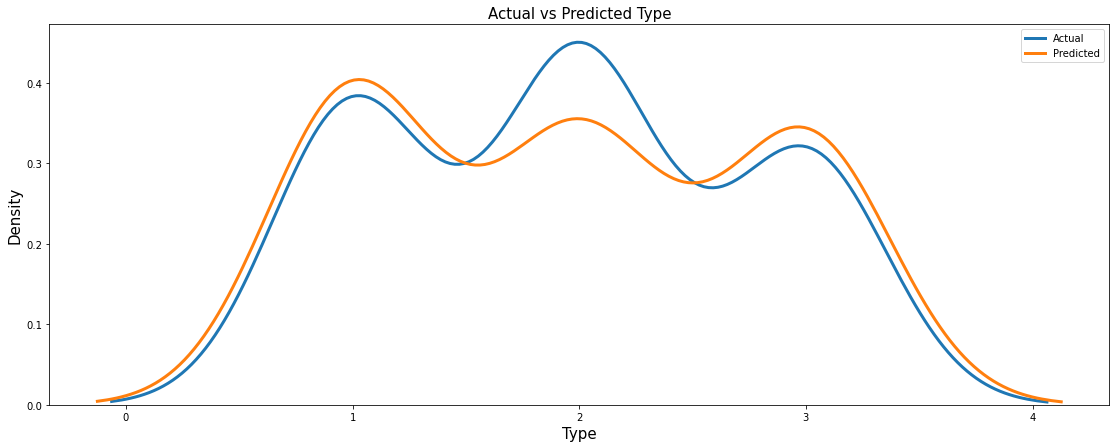

In [33]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", linewidth = 3)
sns.kdeplot(x = y_pred, label = "Predicted", linewidth = 3)
plt.title("Actual vs Predicted Type", size = 15)
plt.xlabel("Type", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

**Accuracy**

In [35]:
score = accuracy_score(y_test, y_pred)
score

0.6481481481481481

### Modeling with Normalization

In [50]:
# Apply the scaling method to the dataset used for modeling.
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size = 0.3,
                                                    stratify = y)

# Fit the k-nearest neighbors model to the training data.
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred})[:10]

,Actual,Predicted
36,1,1
54,1,1
105,2,2
86,2,2
42,1,1
43,1,1
69,2,2
103,2,2
40,1,1
149,3,3


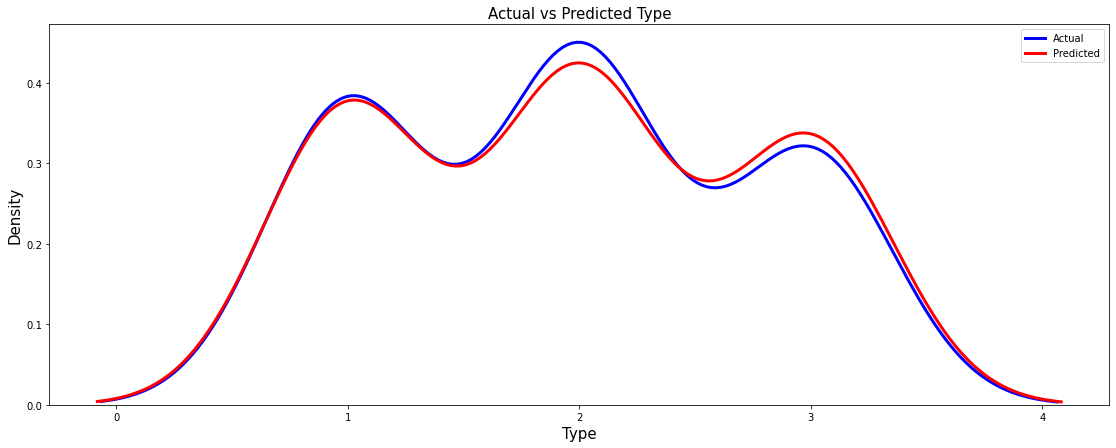

In [52]:
plt.figure(figsize = (19, 7))
sns.kdeplot(data = df, x = y_test, label = "Actual", color = "blue", linewidth = 3)
sns.kdeplot(x = y_pred, label = "Predicted", color = "red", linewidth = 3)
plt.title("Actual vs Predicted Type", size = 15)
plt.xlabel("Type", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

**Accuracy**

In [53]:
score = accuracy_score(y_test, y_pred)
score

0.9814814814814815

### Log Normalization

**Proline column in our juice dataset has a large amount of variance, let's log normalize it**

In [39]:
# Print out the variance of the Proline column
print(juice["Proline"].var())

99166.71735542428


In [43]:
# Apply the log normalization function to the Proline column
juice["Proline_log"] = np.log(juice["Proline"])

# Check the variance of the normalized Proline column
print(juice["Proline_log"].var())

0.17231366191842018


### Scaling Data

In [45]:
# Features
X = juice[juice.columns.drop("Type")]

# Target
y = juice["Type"]

In [46]:
# Apply Scaling
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [48]:
# Scaled Features
df_scaled[:3]

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Proline_log
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1.063991
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1.029723
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1.321922


In [49]:
df_scaled.var()

Alcohol                         1.00565
Malic acid                      1.00565
Ash                             1.00565
Alcalinity of ash               1.00565
Magnesium                       1.00565
Total phenols                   1.00565
Flavanoids                      1.00565
Nonflavanoid phenols            1.00565
Proanthocyanins                 1.00565
Color intensity                 1.00565
Hue                             1.00565
OD280/OD315 of diluted wines    1.00565
Proline                         1.00565
Proline_log                     1.00565
dtype: float64